Iteration:  15


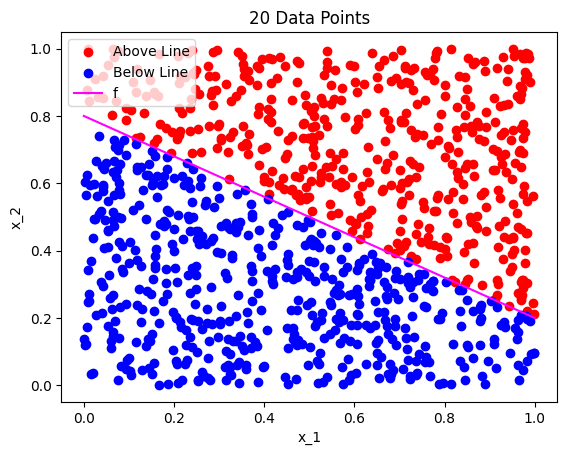

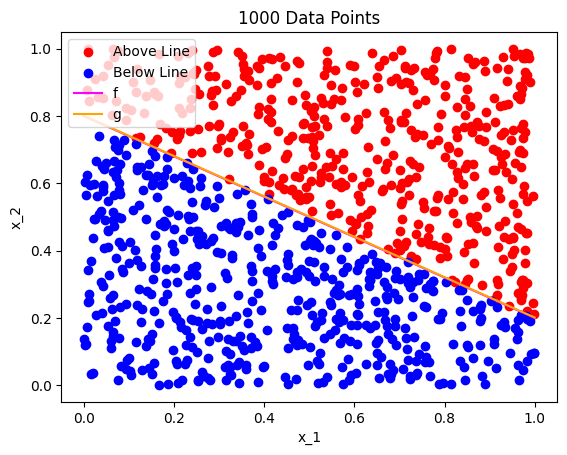

In [1]:
import numpy as np
import matplotlib.pyplot as plt

if __name__ == '__main__':
    
    # Number of data points
    size = 1000

    # Generates the points
    x_1 = np.random.rand(size)
    x_2 = np.random.rand(size)
    
    m = -.6
    b = .8

    line = m * x_1 + b
    above_line = x_2 > line
    below_line = x_2 <= line

    # PLA
    weights = np.zeros(3, dtype=float)
    iteration = 0
    truth = np.where(x_2 > line, 1, -1)
    while True:
        
        exit = True
        for x1, x2, truth_value in zip(x_1, x_2, truth):
            
            prediction = np.sign(np.dot(weights, np.array([1, x1, x2])))
            prediction = int(prediction)
            truth_value = int(truth_value)

            # Updates weights
            if prediction != truth_value:
                exit = False
                weights += np.array([1, x1, x2]) * truth_value
        
        if exit:
            break
        
        iteration += 1

    print("Iteration: ", iteration)

    # FIGURE 1 - Only used for part a
    # Plots points
    plt.figure(1)
    plt.scatter(x_1[above_line], x_2[above_line], color='red', label='Above Line')
    plt.scatter(x_1[below_line], x_2[below_line], color='blue', label='Below Line')

    # Plot f
    x_1_vals = np.array([0, 1])
    x_2_vals = m * x_1_vals + b    
    plt.plot(x_1_vals, x_2_vals, color='magenta', label=f'f')
    
    plt.title('20 Data Points')
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.legend()


    # FIGURE 2
    # Plots points
    plt.figure(2)
    plt.scatter(x_1[above_line], x_2[above_line], color='red', label='Above Line')
    plt.scatter(x_1[below_line], x_2[below_line], color='blue', label='Below Line')

    # Plot f
    x_1_vals = np.array([0, 1])
    x_2_vals = m * x_1_vals + b
    plt.plot(x_1_vals, x_2_vals, color='magenta', label=f'f')

    # Plot g
    g_w1 = 0
    g_w2 = 0
    x_1_vals = np.array([0, 1])
    x_2_vals = -(weights[1] * x_1_vals + weights[0]) / weights[2]
    plt.plot(x_1_vals, x_2_vals, color='orange', label=f'g')

    # Label and show
    plt.title('1000 Data Points')
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.legend()
    plt.show()